###Projeto: Case de Dados
- Objetivo: Reduzir o Churn
-
Meta: 8% ao mês.

## **<span style="color:red">Etapa 1: Coleta dos dados</span>**

In [1]:
#Importação das bibliotecas necessárias
import pandas as pd
from datetime import datetime

In [2]:
# Importando o arquivo .csv
amostra = pd.read_csv('/content/drive/MyDrive/Petlove/amostra.csv')

In [3]:
#Conhecendo mais sobre o dataset
amostra.head(1)

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,08/15/17 07:05 AM,01/14/21 11:23 AM,NaN,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,07/10/74 12:00 AM,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,01/14/21 11:23 AM,151.142942,10,906.857651,6,35,crm


Para fins de maior compreensão sobre o dataset, segue sobre as colunas e seus significados.

- **id** Identificação do cliente
- **created_at** Data de criação da assinatura
- **updated_at** Data da última modificação da assinatura
- **deleted_at** Data de cancelamento da assinatura
- **name_hash** Nome do usuário(criptografado)
- **email_hash** Email(criptografado)
- **address_hash** Endereço (criptografado)
- **birth_date** Data de aniversário do cliente
- **status Status** da assinatura
- **version** Versão da assinatura
- **city** Cidade do cliente
- **state** Estado do cliente
- **neighborhood** Bairro do cliente
- **last_date_purchase** Data do último pedido que ocorreu pela assinatura
- **average_ticket** Média de gasto por pedido
- **items_quantity** Média de itens na assinatura
- **all_revenue** Total de receita realizado pelo cliente
- **all_orders** Total de pedidos realizado pelo cliente
- **recency** Tempo desde a última compra do cliente
- **marketing_source** Canal de marketing que converteu a assinatura


## **Etapa 2: Preparação dos dados**
É a etapa minuciosa onde os dados são "limpos" e se tornam aptos para a análise.

Essa etapa tem o objetivo de reduzir discrepâncias, evitar valores nulos, indicar as anomalias e preencher lacunas.

Essas informações, se não tratadas, acabam prejudicando o processo como um todo, já que a análise poderá ser comprometida caso os dados não sejam verdadeiros

In [ ]:
amostra.info()

Conforme pode ser visto acima, nosso dataset possui:
- 10000 itens
- 20 colunas
- composto por tipo de dados em formato de texto, numero e decimal.
- está usando 1.5 MB de memória
- que a coluna 'deleted_at' possui apenas 505 registros. Podemos então afirmar que para este conjunto de dados, há 505 cancelamentos. Portanto a porcentagem de cancelamento da amostra é de 5,05%.

Como pode ser percebido, as colunas **'created_at', 'updated_at', 'deleted_at', 'birth_date' e 'last_date_purchase'** deveriam ser do tipo data e não texto. Mudar esse tipo de dados para data, permitirá ao cientista/analista realize operações entre as colunas, como subtração de dados para descobrir dias.

Sendo assim, nosso próximo passo é fazer essa conversão.

Porém para tanto, a partir desse momento, um novo dataset será criado a partir da coluna 'status' que possuem o valor igual a 'canceled'.

In [ ]:
# Selecionando as colunas que serão convertidas
date_columns = ['created_at','updated_at', 'birth_date','last_date_purchase']

In [19]:
# Função para ajustar os anos para o formato correto
def ajustar_ano(data_str):
    ano = int(data_str[6:8])
    if ano >= 22:
        ano += 1900
    else:
        ano += 2000
    return data_str[:6] + str(ano) + data_str[-9:]

date_columns = ['created_at','updated_at','birth_date','last_date_purchase']

# Aplicando a função de ajuste nos dados antes de converter para datetime
amostra[date_columns] = amostra[date_columns].applymap(ajustar_ano)
amostra[date_columns] = amostra[date_columns].apply(pd.to_datetime, format='%m/%d/%Y %I:%M %p')
amostra.head(1)

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,2017-08-15 07:05:00,2021-01-14 11:23:00,NaN,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,1974-07-10,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,2021-01-14 11:23:00,151.142942,10,906.857651,6,35,crm


### Dataframe dos cancelamentos

In [5]:
canceled = amostra.loc[(amostra['status'] == 'canceled')]

In [ ]:
# Função para ajustar os anos para o formato correto
def ajustar_ano(data_str):
    ano = int(data_str[6:8])
    if ano >= 22:
        ano += 1900
    else:
        ano += 2000
    return data_str[:6] + str(ano) + data_str[-9:]

# Selecionando as colunas que serão convertidas
date_columns = ['created_at','updated_at','deleted_at','birth_date','last_date_purchase']

# Aplicando a função de ajuste nos dados antes de converter para datetime
canceled[date_columns] = canceled[date_columns].applymap(ajustar_ano)
canceled[date_columns] = canceled[date_columns].apply(pd.to_datetime, format='%m/%d/%Y %I:%M %p')
canceled.head(1)

In [11]:
canceled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 12 to 9976
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  505 non-null    object        
 1   created_at          505 non-null    datetime64[ns]
 2   updated_at          505 non-null    datetime64[ns]
 3   deleted_at          505 non-null    datetime64[ns]
 4   name_hash           505 non-null    object        
 5   email_hash          505 non-null    object        
 6   address_hash        505 non-null    object        
 7   birth_date          505 non-null    datetime64[ns]
 8   status              505 non-null    object        
 9   version             505 non-null    object        
 10  city                505 non-null    object        
 11  state               505 non-null    object        
 12  neighborhood        505 non-null    object        
 13  last_date_purchase  505 non-null    datetime64[n

Tendo realizado o procedimento, foi criado para fins didáticos um modelo fisico dos dados, caso a criação de um banco de dados fosse obrigatória. Observe que os nomes das colunas foram renomeados para maior entendimento da tabela.

O id aqui é utilzado como chave primária,sendo este único para cada usuario no sistema.

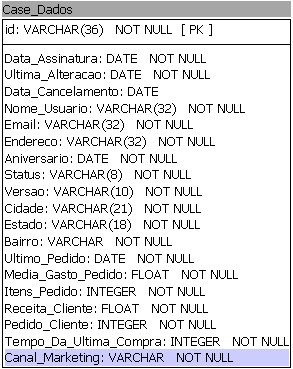

# Criando Um Novo Dataframe
Considerando que uma das funções de um engenheiro de dados é disponibilizar dados ao cientista/análise de forma estruturada e também pensar na arquitetura e seu custo, criaremos um novo dataframe.

In [63]:
new_canceled = canceled[['id','created_at','updated_at','deleted_at','birth_date','state','last_date_purchase','average_ticket', 'items_quantity', 'all_revenue','all_orders','recency','marketing_source']]

In [66]:
new_canceled = new_canceled.rename(columns={"created_at": "Data_Assinatura", "updated_at": "Ultima_Alteracao", "deleted_at": "Data_Cancelamento",
                                            "birth_date":"Aniversário", "state": "Estado",
                                            "last_date_purchase": "Ultimo_Pedido", "average_ticket": "Medio_Gasto_Pedido",
                                            "items_quantity": "Itens_Pedidos","all_revenue": "Receita_Cliente",
                                            "all_orders": "Pedido_Cliente","recency": "Tempo_Da_Ultima_Compra",
                                            "marketing_source": "Canal_Marketing"})

# Análises

### Dados Estatisticos

In [14]:
# Dados estatisticos do nosso dataframe
new_canceled.describe()

,Medio_Gasto_Pedido,Itens_Pedidos,Receita_Cliente,Pedido_Cliente,Tempo_Da_Ultima_Compra
count,505.000000,505.000000,505.000000,505.000000,505.000000
mean,217.438501,8.647525,1059.405752,4.857426,680.970297
std,22.503191,2.951748,774.373741,3.483446,463.006656
min,151.804161,1.000000,0.000000,0.000000,1.000000
25%,201.934997,7.000000,403.113961,2.000000,278.000000
50%,217.998175,9.000000,984.359042,5.000000,600.000000
75%,232.135380,11.000000,1669.802614,8.000000,1031.000000
max,278.300436,18.000000,2873.700656,11.000000,1820.000000


Relebrando o significado de cada coluna.
- **Medio_Gasto_Pedido** Média de gasto por pedido
- **Itens_Pedidos** Média de itens na assinatura
- **Receita_Cliente** Total de receita realizado pelo cliente
- **Pedido_Cliente** Total de pedidos realizado pelo cliente
- **Tempo_Da_Ultima_Compra** Tempo desde a última compra do cliente

Os dados acima mostram que:

Média de gasto por pedido é de **R$ 217,44**, sofrendo variação de **22,5%** em relação a este valor;

Há cliente nessa amostra que sua **última compra** foi realizada **à 5 anos atrás**;

A maioria dos pedidos possuem pelo **menos 6 itens**. Na hora de comprar algo para seu pet, dificilmente seu dono realiza a compra de único objeto.




### Análise dos Canais de Marketing

In [15]:
canalTodos = amostra['marketing_source'].value_counts()
canalTodos

organic_search       3699
direct               2149
paid_search          1526
telegram_whatsapp    1068
crm                  1029
none                  529
Name: marketing_source, dtype: int64

In [ ]:
canal = new_canceled['Canal_Marketing'].value_counts()
canal

organic_search       196
direct                96
paid_search           70
telegram_whatsapp     66
crm                   43
none                  34
Name: Canal_Marketing, dtype: int64


Os valores acimas mostra que:
* o maior canal de atração da empresa é o **organic search**, correspondendo aproximadamente a 34% da amostra.
* A maior taxa de cancelamento entre os canais apresentados é do **'telegram_whatsapp'**, ficando em **6,18%**. (A cada 100 pessoas que assinam por este canal, 6 acabam cancelando).
* **A menor taxa de cancelamento é de 4,19% através do CRM.**

### Por Mês e Ano

In [67]:
new_canceled['mes'] = new_canceled['Data_Cancelamento'].dt.month
new_canceled['ano'] = new_canceled['Data_Cancelamento'].dt.year

In [20]:
amostra['mes'] = amostra['created_at'].dt.month
amostra['ano'] = amostra['created_at'].dt.year

In [43]:
assinatura['qtde_assinatura'] = (amostra.groupby(['ano'])['created_at']).count()
assinatura['qtde_cancelamento'] = new_canceled.groupby(['ano'])['Data_Assinatura'].count()
assinatura['%cancelamento_ano'] = ((assinatura['qtde_cancelamento']*100)/(assinatura['qtde_assinatura']))
assinatura = pd.DataFrame(assinatura)

In [44]:
assinatura

,created_at,qtde_assinatura,qtde_cancelamento,%cancelamento_ano
ano,,,,
2016,1770,1770,9,0.508475
2017,2001,2001,33,1.649175
2018,1995,1995,59,2.957393
2019,2035,2035,106,5.208845
2020,1946,1946,239,12.281603
2021,253,253,59,23.320158


Conforme visto acima, a maior taxa de cancelamento nessa amostra é do ano de 2021, ficando em 23,32% no periodo. Para fins de entender ainda mais esses dados, vamos comparar o mesmo periodo nos dois anos.

In [52]:
mes_ano = amostra.groupby(['ano', 'mes'])['created_at'].count()

In [57]:
mes_ano['cancelamentos'] = new_canceled.groupby(['ano', 'mes'])['Data_Cancelamento'].count()

In [69]:
mes_ano = pd.DataFrame(mesano)

In [70]:
# Uilizando como filtro os anos de 2020 e 2021 e os meses de janeiro e fevereiro
mes_ano

created_at  cancelamentos
ano  mes                           
2016 2            70            NaN
     3           172            NaN
     4           149            NaN
     5           181            1.0
     6           199            1.0
...              ...            ...
2020 10          157           20.0
     11          142           32.0
     12          163           37.0
2021 1           145           33.0
     2           108           26.0

[61 rows x 2 columns]

Para melhor visualização criamos uma tabela:

| ano | assinaturas | cancelamentos |
|:---:|:---:|:---:|
|2020|317|29|
| 2021|253|59|
|**Total**|**570**|**88**|

Percebemos que no mesmo periodo, no ano de 2021 teve uma diminuição nas assinaturas e um aumento dos cancelamentos. Mostrando a uma possível tendencia de queda nas assinaturas e aumento dos cancelamentos.

Inclusive a partir desses dados podemos inferir sobre o Churn nos dois periodos.
Em 2020 a taxa de churn era 9,15%. Já em 2021 a taxa estava em torno de 23,32%.

Inclusive, atento parao fato de que não foi analisado sobre as assinaturas com status de pausadas. Devendo elas posteriormente serem analisadas.

### Tempo Médio de Cancelamento

In [72]:
new_canceled.columns

Index(['id', 'Data_Assinatura', 'Ultima_Alteracao', 'Data_Cancelamento',
       'Aniversário', 'Estado', 'Ultimo_Pedido', 'Medio_Gasto_Pedido',
       'Itens_Pedidos', 'Receita_Cliente', 'Pedido_Cliente',
       'Tempo_Da_Ultima_Compra', 'Canal_Marketing', 'mes', 'ano'],
      dtype='object')

In [73]:
new_canceled['dias_ate_canc'] = new_canceled['Data_Cancelamento'] - new_canceled['Data_Assinatura']

In [74]:
diasAteCanc = new_canceled[['Data_Assinatura','Data_Cancelamento','dias_ate_canc']]

In [75]:
diasAteCanc.describe()

,dias_ate_canc
count,505
mean,472 days 04:48:01.306930688
std,423 days 15:36:54.176120120
min,0 days 11:40:00
25%,133 days 13:42:00
50%,322 days 02:08:00
75%,750 days 21:23:00
max,1771 days 00:09:00


Por último é apresentado uma mediana dos dias que um cliente permanece ativo conosco: **322 dias**. Ou seja, até 50%  dos clientes dessa amostra tendem a manter a assinatura pelo prazo de até um ano.

In [61]:
amostra.to_csv('amostra.csv', sep = ';', encoding='utf-8')

In [68]:
new_canceled.to_csv('cancelamentos.csv', sep = ';', encoding='utf-8')

# Próximos Passos



Baseado no blog https://www.zendesk.com.br/blog/churn-rate/ e nos dados acimas:
1. **Invista em Customer Success**:
É percebido que atualmente o maior indice de cancelamento provém de assinaturas realizadas através de mensageiros (telegram_whatsApp), mostrando que há uma falta de aproximação e manutenção do relacionamento com os clientes usando este meio.

2. **Encare feedbacks como oportunidades**:
Investir em pesquisa de satisfação dos clientes em caso de ativos. Nos casos de assinaturas pausadas ou canceladas, buscar entender quais foram os motivos que levaram ao cancelamento da assinatura.

3. **Antecipe-se à fuga de um cliente**:
Como no insight acima, podemos constatar que um cliente mantém a assinatura em média por um ano. Quais são as ações necessárias para que o mesmo permaneça ? Ativações temporais são necessárias para a manutenção do cliente.
Como seria sentir sempre que fez um bom negócio e que o cliente e seu pet não são apenas numeros?

4. **Investimento em um sistema de recomendação**: foi constatado nas análises estatisticas que em média, são comprados mais de um item para os seus pets. Então porque não recomendar produtos baseados no padrão do cliente?

5. **Investimento em IA**: imagina um produto que seu pet está quase acabando e no meio da tarde você recebe um email: "Olá, observamos que sua ultima compra foi realizada dia XX/XX e imaginamos que você não queria que [nome pet] fique sem aquele petisco que ele ama. Deseja efetuar sua compra agora?

Isso faria da empresa ativa as necessidades dos assinantes, proporcionado ao mesmo a sensação de ser importante a empresa.

